In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
#eda

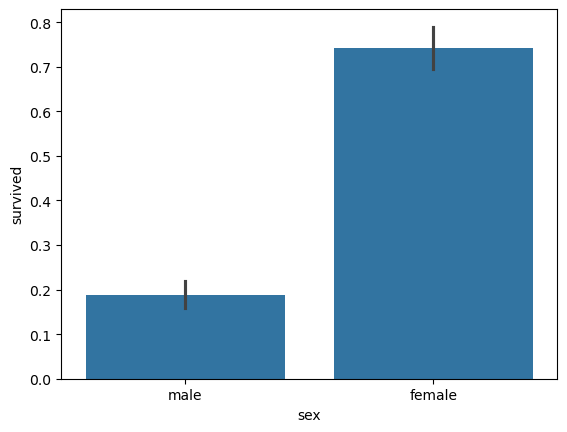

In [6]:
sns.barplot( data= df, x="sex", y="survived")
plt.show()

In [7]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

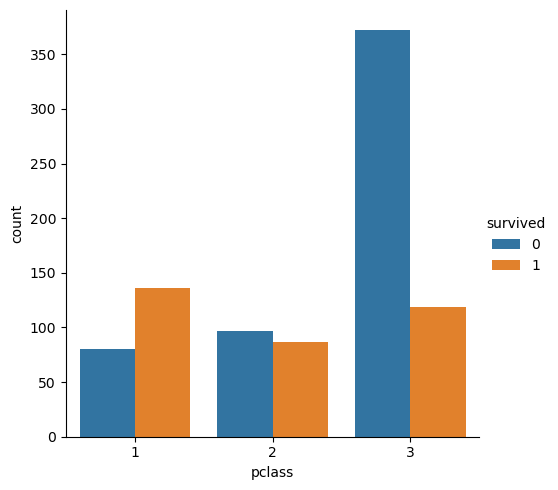

In [8]:
sns.catplot( data= df, x="pclass", hue="survived", kind="count")
plt.show()
#kategorik degişkenlere ayırmak için count daha mantıklı.

<Axes: xlabel='age', ylabel='Count'>

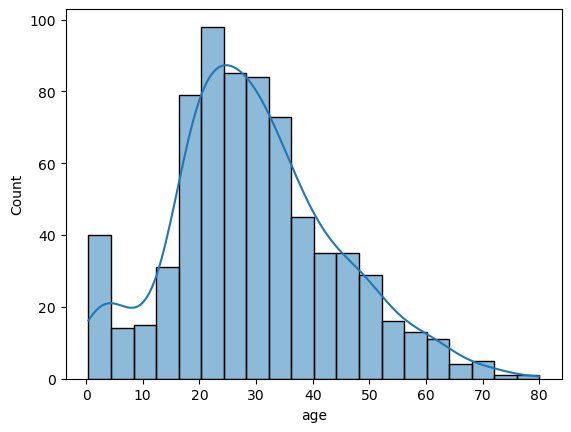

In [9]:
sns.histplot(data =df, x="age", kde=True)

In [10]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

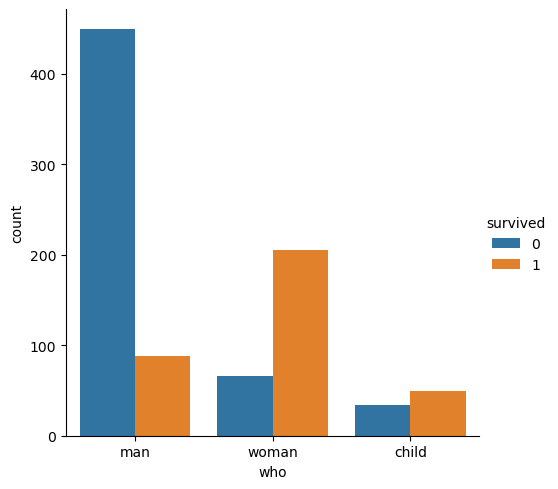

In [11]:
sns.catplot( data= df, x="who", hue="survived", kind="count")
plt.show()

In [12]:
#feature engineering

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df.shape

(891, 15)

In [15]:
df =df.drop(["deck","embark_town","alive"],axis=1)

In [16]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [17]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df["age"] = df["age"].fillna(df["age"].median())
df["embarked"] = df["embarked"].fillna (df["embarked"].mode()[0])

In [19]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [20]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [22]:
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [23]:
df["embarked"].value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [24]:
df["who"].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [25]:
df["alone"]

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: alone, Length: 891, dtype: bool

In [60]:
df["adult_male"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

In [62]:
df["adult_male"] = df["adult_male"].astype(int)
df["alone"] = df["alone"].astype(int)

In [64]:
X = df.drop("survived" , axis=1)
y= df["survived"]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size =0.25, random_state =15 )

In [68]:
#one-hot encoding

In [70]:
import pandas as pd
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=15
)

categorical_cols = ['sex', 'class', 'who', 'embarked']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(verbosity=-1))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       127
           1       0.76      0.75      0.75        96

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

[[104  23]
 [ 24  72]]


In [72]:
#hyperparameter tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
lgb_model = lgb.LGBMClassifier(verbosity=-1)

In [78]:
# param_grid = {
#     'n_estimators': [100, 300, 500, 1000],
#     'max_depth': [3, 5, 7, -1],
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'num_leaves': [15, 31, 63, 127],
#     'min_child_samples': [5, 10, 20],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

In [92]:
#random_search =  RandomizedSearchCV (estimator=model, param_distributions= param_grid, cv =5, scoring="accuracy",
                                    # verbose= 1, n_jobs =-1)

In [94]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'classifier__n_estimators': [100, 300, 500, 1000],
    'classifier__max_depth': [3, 5, 7, -1],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'classifier__num_leaves': [15, 31, 63, 127],
    'classifier__min_child_samples': [5, 10, 20],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=model,        # 🔥 model = Pipeline
    param_distributions=param_grid,
    cv=5,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['sex',
                                                                                'class',
                                                                                'who',
                                                                                'embarked'])])),
                                             ('classifier',
                                              LGBMClassifier(verbosity=-1))]),
                   n_jobs=-1,
                   param_distributions={'classifier__colsample_bytree': [0.6,
                                                                         0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01,
                                                                      0.05, 0.1,
                                                                      0.3],
                                        'classifier__max_depth': [3, 5, 7, -1],
                                        'classifier__min_child_samples': [5, 10,
                                                                          20],
                                        'classifier__n_estimators': [100, 300,
                                                                     500,
                                                                     1000],
                                        'classifier__num_leaves': [15, 31, 63,
                                                                   127],
                                        'classifier__subsample': [0.6, 0.8,
                                                                  1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [99]:
random_search.best_params_

{'classifier__subsample': 1.0,
 'classifier__num_leaves': 63,
 'classifier__n_estimators': 300,
 'classifier__min_child_samples': 10,
 'classifier__max_depth': 5,
 'classifier__learning_rate': 0.05,
 'classifier__colsample_bytree': 0.8}

In [101]:
y_pred = random_search.predict(X_test)

In [103]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       137
           1       0.71      0.79      0.75        86

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.80      0.79      0.80       223

[[109  28]
 [ 18  68]]
